In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
%matplotlib inline

# team distance= sum of distances between most similar players in two teams

In [2]:
def team_distance(player_data,team1,team2):
    sum_distance=0
    df1=player_data[player_data['team']==team1][['x','y']]
    df2=player_data[player_data['team']==team2][['x','y']]
    m_distance=euclidean_distances(df1,df2)
    for rows in m_distance:
        sum_distance+=min(rows)
    return sum_distance

In [ ]:
# distances between all teams for 

In [24]:
def team_distance_matrix(year='2013-14'):
    file_name='_'.join(['projected',year])
    player_data=pd.read_csv(file_name)
    player_data['cluster']=player_data['cluster'].astype('category')
    teams=sorted(player_data.team.unique())
    n_teams=len(teams)
    td_matrix=np.zeros((n_teams,n_teams))
    for i in range(n_teams):
        for j in range(n_teams):
                td_matrix[i,j]=team_distance(player_data,teams[i],teams[j])
    return [td_matrix,teams]

In [26]:
def team_hierarchy(year='2013-14'):
    td_matrix,teams=team_distance_matrix()
    Z=hierarchy.linkage(td_matrix)
    plt.figure(figsize=(10,8))
    dn=hierarchy.dendrogram(Z,labels=teams)
    file_name='_'.join(['team_hierarchy',year])
    plt.title(file_name)
    plt.show()
#    plt.imsave('ff',dn.values)

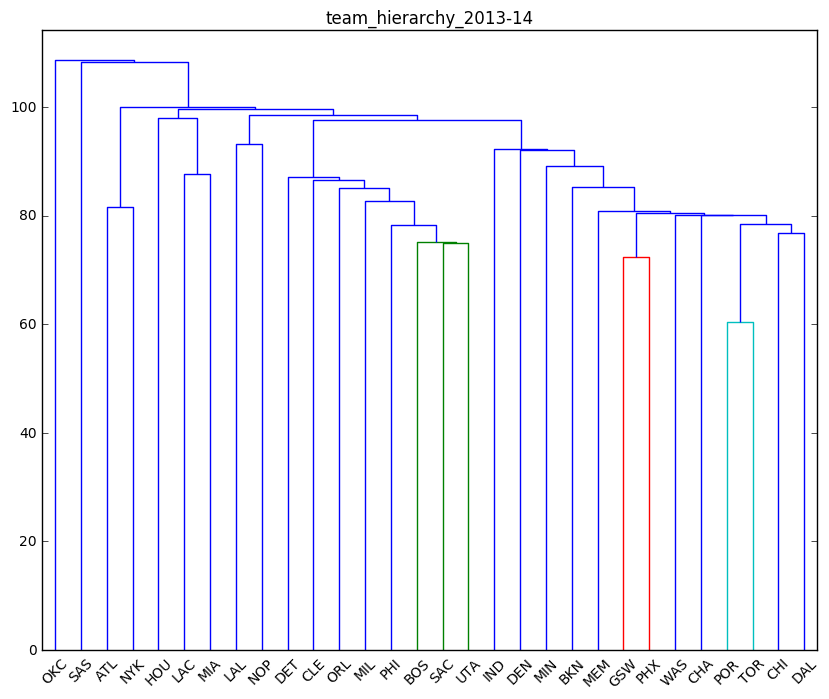

In [27]:
team_hierarchy('2013-14')

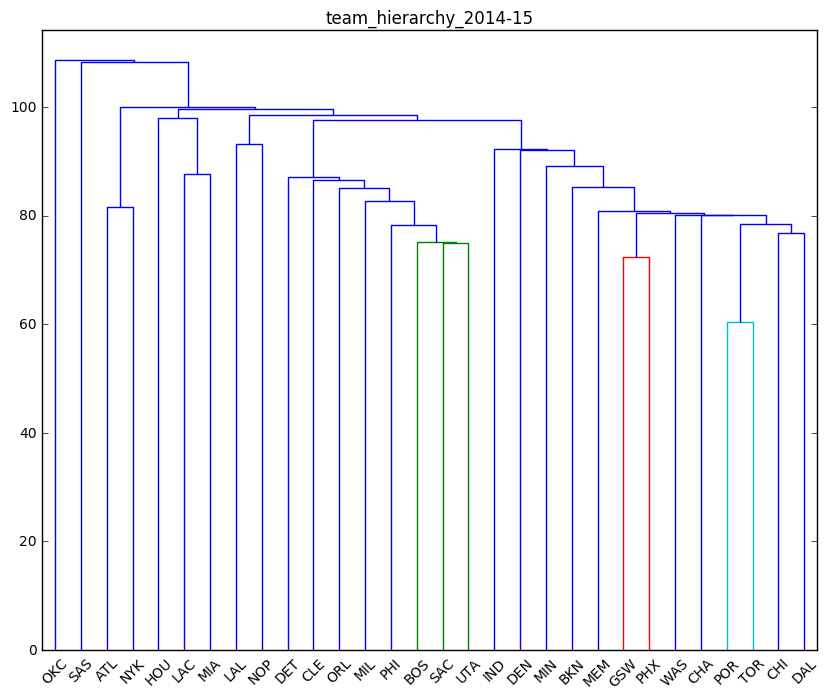

In [28]:
team_hierarchy('2014-15')

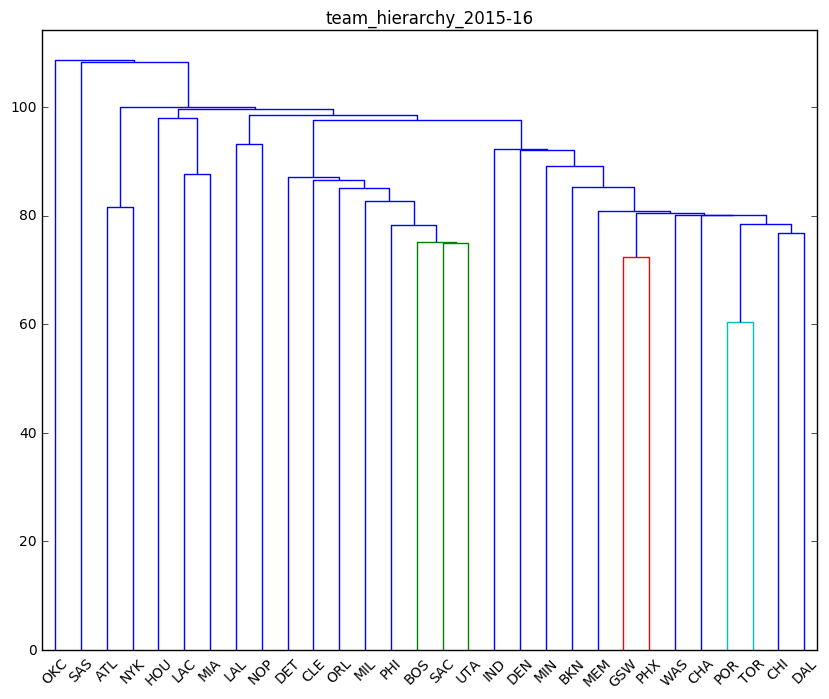

In [29]:
team_hierarchy('2015-16')